
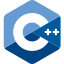
<br>

<div style="text-align:center; font-size:200%;">
 <b>Speicher-Layout von Klassen</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 02 Speicher-Layout von Klassen.ipynb -->
<!-- slides/module_170_oop/topic_125_class_layout.cpp -->


- Wie werden Klassen im Speicher abgelegt?
- Wie werden Methodenaufrufe implementiert?


Speicher-Layout generiert mit:

```bash
clang++ -cc1 -emit-llvm -fdump-record-layouts layout_examples.cpp > layout_examples.txt
```

In [ ]:
class PlainOldClass
{
public:
    int x;
    PlainOldClass(int x) : x{x} {}

    void print() const {}
};

```
*** Dumping AST Record Layout
         0 | class PlainOldClass
         0 |   int x
           | [sizeof=4, dsize=4, align=4,
           |  nvsize=4, nvalign=4]
```


<img src="../img/class-layout-poc.png" width="35%">

In [ ]:
class BaseV1
{
public:
    int x;
    BaseV1(int x) : x{x} {}

    void print() const {}
};

```
*** Dumping AST Record Layout
         0 | class BaseV1
         0 |   int x
           | [sizeof=4, dsize=4, align=4,
           |  nvsize=4, nvalign=4]
```


<img src="../img/class-layout-base-v1.png" width="35%">

In [ ]:
class DerivedV1 : public BaseV1
{
public:
    int y;
    DerivedV1(int x, int y) : BaseV1{x}, y{y} {}

    void print() const {}
};

```
*** Dumping AST Record Layout
         0 | class DerivedV1
         0 |   class BaseV1 (base)
         0 |     int x
         4 |   int y
           | [sizeof=8, dsize=8, align=4,
           |  nvsize=8, nvalign=4]
```


<img src="../img/class-layout-derived-v1.png" width="35%">

In [ ]:
class BaseV2
{
public:
    int x;
    BaseV2(int x) : x{x} {}

    virtual void print() const {}
};

```
*** Dumping AST Record Layout
         0 | class BaseV2
         0 |   (BaseV2 vtable pointer)
         8 |   int x
           | [sizeof=16, dsize=12, align=8,
           |  nvsize=12, nvalign=8]
```


<img src="../img/class-layout-base-v2.png" width="75%">

In [ ]:
class DerivedV2 : public BaseV2
{
public:
    int y;
    DerivedV2(int x, int y) : BaseV2{x}, y{y} {}

    void print() const override {}
};

```
*** Dumping AST Record Layout
         0 | class DerivedV2
         0 |   class BaseV2 (primary base)
         0 |     (BaseV2 vtable pointer)
         8 |     int x
        12 |   int y
           | [sizeof=16, dsize=16, align=8,
           |  nvsize=16, nvalign=8]
```


<img src="../img/class-layout-derived-v2.png" width="75%">

In [ ]:
class BaseV3
{
public:
    int y;
    BaseV3(int y) : y{y} {}

    virtual void foo() const {}
};

```
*** Dumping AST Record Layout
         0 | class BaseV3
         0 |   (BaseV3 vtable pointer)
         8 |   int y
           | [sizeof=16, dsize=12, align=8,
           |  nvsize=12, nvalign=8]
```


<img src="../img/class-layout-base-v3.png" width="75%">

In [ ]:
class DerivedV3
    : public BaseV2
    , public BaseV3
{
public:
    int z;
    DerivedV3(int x, int y, int z) : BaseV2{x}, BaseV3{y}, z{z} {}

    void print() const override {}
};

```
*** Dumping AST Record Layout
         0 | class DerivedV3
         0 |   class BaseV2 (primary base)
         0 |     (BaseV2 vtable pointer)
         8 |     int x
        16 |   class BaseV3 (base)
        16 |     (BaseV3 vtable pointer)
        24 |     int y
        28 |   int z
           | [sizeof=32, dsize=32, align=8,
           |  nvsize=32, nvalign=8]
```


<img src="../img/class-layout-derived-v3.png" width="75%">


- Pointer auf das gleiche Objekt können unterschiedliche Adressen haben:

In [ ]:
BaseV3 b3{4};
DerivedV3 d3{1, 2, 3};

In [ ]:
BaseV2 *pb2 = &d3;
BaseV3 *pb3 = &d3;

In [ ]:
#include <iostream>

std::cout << "pb2: " << pb2 << "\n";
std::cout << "pb3: " << pb3 << "\n";
std::cout << "ab3: " << &b3 << "\n";

In [ ]:
DerivedV3* ccpb2{(DerivedV3*)(pb2)};
DerivedV3* ccpb3{(DerivedV3*)(pb3)};
DerivedV3* ccab3{(DerivedV3*)(&b3)};

In [ ]:
std::cout << "ccpb2: " << ccpb2 << "\n";
std::cout << "ccpb3: " << ccpb3 << "\n";
std::cout << "ccab3: " << ccab3 << "\n";

In [ ]:
ccab3->y

In [ ]:
DerivedV3* scpb2{static_cast<DerivedV3*>(pb2)};
DerivedV3* scpb3{static_cast<DerivedV3*>(pb3)};
DerivedV3* scab3{static_cast<DerivedV3*>(&b3)};

In [ ]:
std::cout << "ccab3: " << ccab3 << "\n";
std::cout << "scpb2: " << scpb2 << "\n";
std::cout << "scpb3: " << scpb3 << "\n";

In [ ]:
DerivedV3* dcpb2{dynamic_cast<DerivedV3*>(pb2)};
DerivedV3* dcpb3{dynamic_cast<DerivedV3*>(pb2)};
DerivedV3* dcab3{dynamic_cast<DerivedV3*>(&b3)};

In [ ]:
std::cout << "dcpb2: " << dcpb2 << "\n";
std::cout << "dcpb3: " << dcpb3 << "\n";
std::cout << "dcpb3: " << dcpb3 << "\n";


## Vorsicht mit `void*`!

In [ ]:
void* v2{(void*)pb2};
void* v3{(void*)pb3};

In [ ]:
std::cout << "pb2: " << (DerivedV3*)v2 << "\n";
std::cout << "pb3: " << (DerivedV3*)v3 << "\n";

In [ ]:
((DerivedV3*)v3)->x

In [ ]:
d3.x